# 개발목적


### 1. 농구 경기 영상에서 선수와 Ball을 찾고 트래킹한다.

### 2. 경기 영상을 통해 선수 개개인의 스텟(골, 어시스트 등)을 자동으로 기록한다.

### 3. 기록된 스텟을 기반으로 선수의 문제점을 파악하고 솔루션을 제공한다.

1) YOLO를 활용한 Detection

1-1 기존의 학습된 데이터 이용

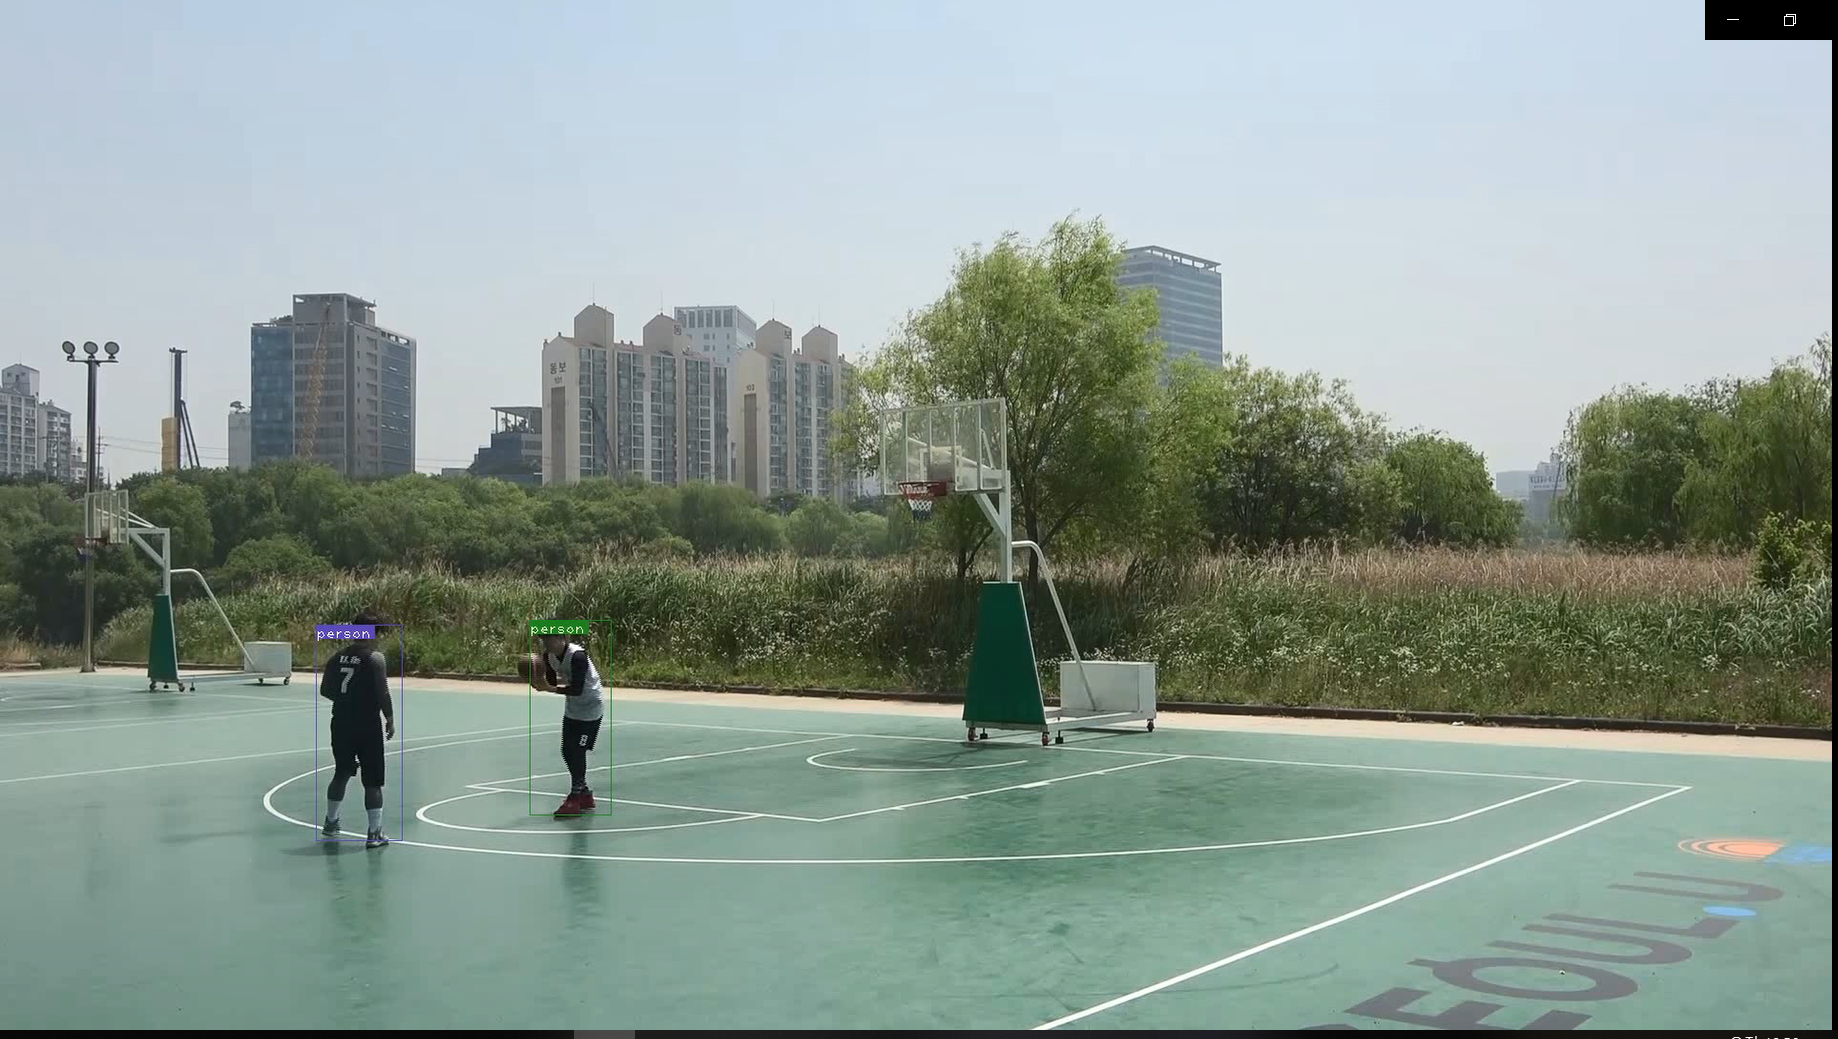



yolo를 활용하면 위와 같은 결과가 나온다. 선수는 잘 detection하지만 공을 detection하지 못하고 선수가 겹쳤을 경우 하나의 사람으로 인식하는 문제가 발생하였다.
=> 기존의 학습된 데이터는 겹쳐진 사람을 학습시킨 것이 아니고 농구공의 특성상 공의 색이 다른 종류의 공과 달라 좋은 성능이 나오지 않다고 판단하여 직접 Labeling하여 우리의 영상을 기준으로 데이터를 학습시켰다.

1-2 학습시킨 데이터 이용


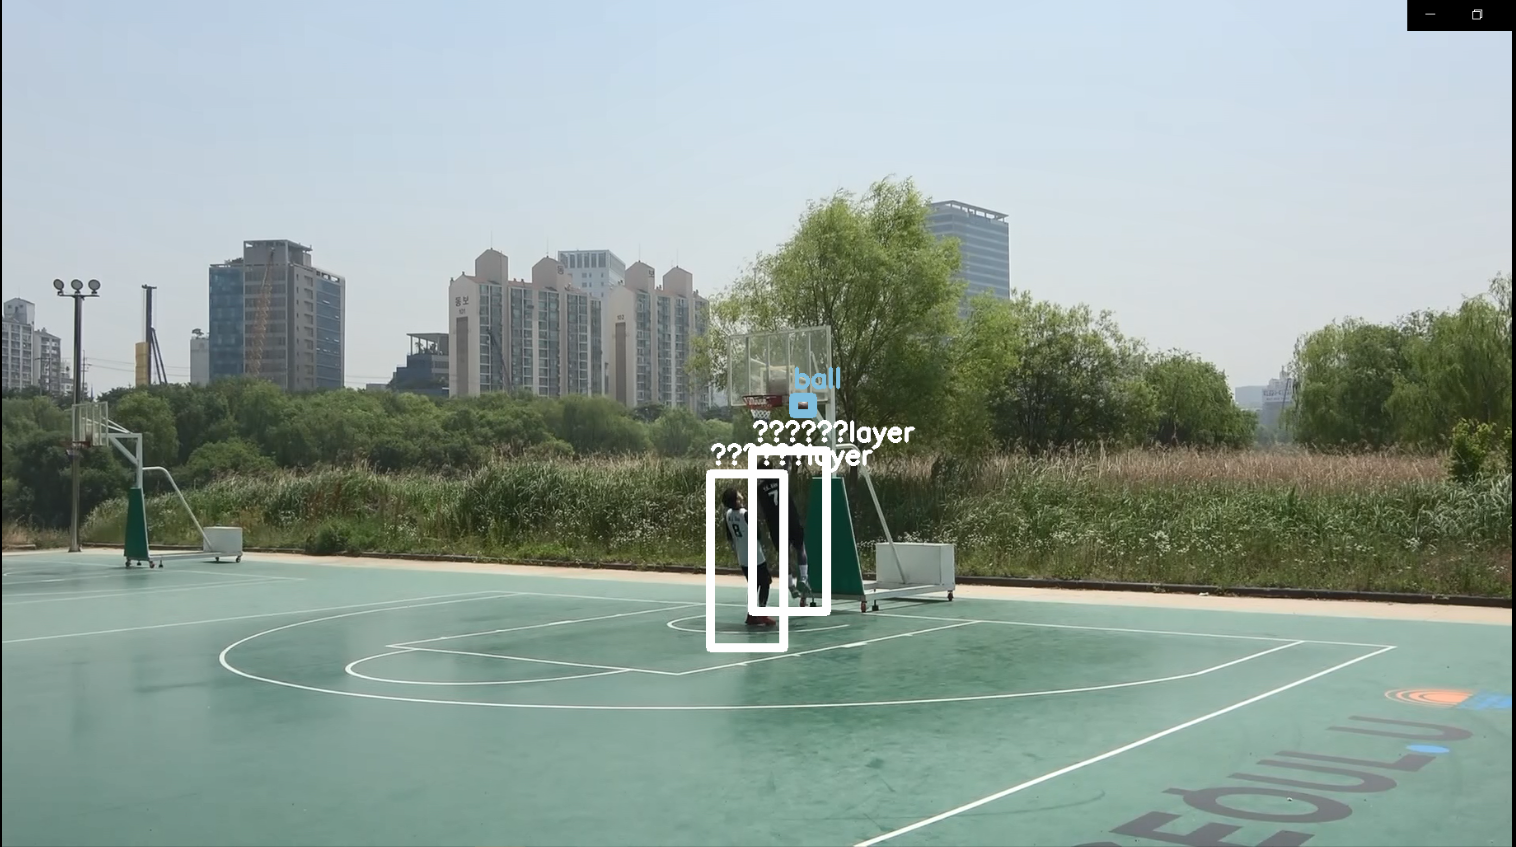



우리의 데이터로 학습시킨 결과 공을 잘 detection 하는 것을 확인할 수 있었다. 또 학습시키는 과정에서 골대안에 있는 공의 이미지를 학습시키면 goal 이벤트를 detection 할 수 있겠다는 생각을 하였고 결과를 확인할 수 있었다.(##결과 데이터 첨부##)

2) Tracking

2-1 SORT 알고리즘 활용 (sample1-Tracking.mp4)
YOLO로 물체를 deteciton한 후 SORT 알고리즘을 활용하여 tracking 하는 방식으로 ball을 잘 detection하지 못하고 선수가 겹친 다음 흩어졌을 때 새로운 object로 인식하는 문제가 있다.



2-2 개선사항 (sample2-revise.avi)
먼저 코트 내에 있는 사람만 detection하고 tracking하게 하기 위해 RoI를 설정하였고 유니폼 색을 기반으로 Bounding Box의 색을 변경하도록 설정하였다.(유니폼 색이 일정하지 않은 점, 특정 각도에서 유니폼 색이 구분이 안 되는 점, 서로 다른 팀이 겹치는 상황에서 아직 부정확하다. -> HSV로 색공간을 변환 시도)


3) 앞으로 진행해야 할 것

3-1 매 frame마다 detecion한 object에 id를 부여하여 선수 개개인의 위치정보를 tracking
    1. 2개의 frame을 불러와 두 frame의 object 간의 거리를 비교하여 각 object에 id를 지속하여 유지
    
    2. 각 object의 특징점(유니폼 색, Histogram 등)을 기준으로 Id를 나누고 매 frame 마다 특징을 추출하여 Id를 부여
    

4) 현재 진행중인 것

4-1 동영상을 Input으로 넣기 위해 자료 형태 변환 및 전처리

4-2 Video Labeling Tool인 VOTT를 이용하여 학습을 위한 데이터(약 1만여장)을 만들고 yolo format에 맞추기 위한 코드 개발

4-3 Object에 Id를 부여하는 방법 고안